https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb

In [1]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [2]:
#check the shape of data
dataset.shape

(6000, 8)

In [5]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
data = dataset.sample(frac=0.9, random_state=786)
data

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
5333,1.50,Good,E,VS2,VG,G,GIA,12702
3749,1.08,Ideal,D,VS2,EX,EX,GIA,8481
2376,2.25,Good,I,VS2,G,VG,GIA,18623
3756,2.27,Very Good,G,VS2,VG,VG,GIA,27252
4248,1.20,Ideal,F,VS1,EX,EX,GIA,9641
...,...,...,...,...,...,...,...,...
1248,0.80,Ideal,E,VS1,VG,VG,GIA,3714
5299,1.02,Very Good,E,SI1,VG,EX,GIA,5424
4979,1.03,Ideal,F,VS2,VG,VG,GIA,6997
933,2.01,Good,H,VS1,VG,VG,GIA,18988


In [6]:
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [7]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Price', session_id=123)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(5400, 8)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
type(exp_reg101)

tuple

In [9]:
best = compare_models(exclude= ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,626.8852,2167206.4646,1393.4210,0.9797,0.0671,0.0490,1.2416
1,Extra Trees Regressor,755.9566,2756642.5198,1604.2591,0.9732,0.0819,0.0607,0.3433
2,Extreme Gradient Boosting,708.8427,2799609.2536,1607.9791,0.9724,0.0743,0.0541,0.1105
3,Light Gradient Boosting Machine,752.2357,3055569.4004,1687.7770,0.9711,0.0773,0.0567,0.0466
4,Random Forest,762.0579,2969421.3714,1671.9701,0.9711,0.0817,0.0597,0.3400
5,Gradient Boosting Regressor,919.7893,3751333.9600,1898.2498,0.9634,0.1024,0.0770,0.2482
6,Decision Tree,998.2558,5292680.3084,2225.8934,0.9479,0.1078,0.0773,0.0151
7,Ridge Regression,2413.5865,14120531.3503,3726.1698,0.8621,0.6689,0.2875,0.0029
8,Linear Regression,2413.7407,14238016.0590,3743.5021,0.8608,0.6682,0.2869,0.0042
9,Lasso Regression,2412.1923,14246796.4091,3744.2303,0.8608,0.6767,0.2866,0.0353


In [11]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


In [12]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,625.1813,1051762.9578,1025.5550,0.9885,0.0715,0.0526
1,797.6185,5638866.1771,2374.6297,0.9568,0.0727,0.0537
2,825.0215,3318727.1968,1821.7374,0.9696,0.0857,0.0616
3,720.3923,1697211.3816,1302.7707,0.9813,0.0714,0.0554
4,645.6800,1799949.1196,1341.6218,0.9775,0.0745,0.0534
5,830.7176,6423604.0184,2534.4830,0.9452,0.0810,0.0567
6,800.2611,3355855.9955,1831.8996,0.9685,0.0793,0.0585
7,714.3607,1930222.6458,1389.3245,0.9756,0.0732,0.0556
8,784.7648,2211933.1546,1487.2569,0.9783,0.0766,0.0582
9,778.3590,3127561.3571,1768.4913,0.9702,0.0872,0.0609


In [13]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,537.3032,745728.1318,863.5555,0.9918,0.0684,0.0495
1,739.5900,5454025.2854,2335.3855,0.9582,0.0666,0.0481
2,666.5563,1635291.9077,1278.7853,0.9850,0.0716,0.0535
3,556.0855,869908.2126,932.6887,0.9904,0.0575,0.0446
4,593.9911,1554758.2686,1246.8995,0.9806,0.0684,0.0489
5,680.1488,4796006.1980,2189.9786,0.9591,0.0683,0.0492
6,590.4674,1438125.1777,1199.2186,0.9865,0.0637,0.0465
7,629.6815,1700989.7652,1304.2200,0.9785,0.0652,0.0486
8,578.8302,1054965.2365,1027.1150,0.9896,0.0603,0.0464
9,696.1985,2422266.4623,1556.3632,0.9769,0.0807,0.0545


In [14]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3976.3115,22638336.5317,4757.9761,0.7515,0.4660,0.5272
1,4238.2412,29522153.3063,5433.4292,0.7737,0.4911,0.5660
2,4409.9848,24626666.3376,4962.5262,0.7741,0.5269,0.6318
3,4201.9811,22493390.2282,4742.7197,0.7518,0.4935,0.5741
4,3623.3398,23358876.5338,4833.1022,0.7087,0.4527,0.5011
5,4565.6610,29732993.3263,5452.7968,0.7462,0.5462,0.6598
6,4684.0814,28516379.6188,5340.0730,0.7321,0.5567,0.6716
7,4446.0672,27422298.8102,5236.6305,0.6532,0.5217,0.6138
8,3870.3897,20611456.9747,4539.9842,0.7976,0.4664,0.5264
9,3667.6258,20126723.1218,4486.2817,0.8084,0.4869,0.5520


In [15]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2799.3407,16439032.0308,4054.5076,0.8195,0.2896,0.2728
1,2966.6977,23597057.7619,4857.6803,0.8192,0.3131,0.2983
2,2566.6406,15658252.5578,3957.0510,0.8564,0.2610,0.2364
3,2602.3745,14383448.2182,3792.5517,0.8413,0.2709,0.2326
4,2583.1811,14185346.1705,3766.3439,0.8231,0.3012,0.2757
5,2739.3273,20428026.4570,4519.7374,0.8257,0.3061,0.2866
6,2776.9122,17107851.9502,4136.1639,0.8393,0.3053,0.2834
7,2888.0504,17889532.1511,4229.6019,0.7738,0.3114,0.2962
8,2639.0625,15672432.4243,3958.8423,0.8461,0.3050,0.2815
9,2620.6692,16400041.6306,4049.6965,0.8438,0.3131,0.2951


In [16]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [17]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,733.2214,1464748.5361,1210.2680,0.9839,0.0892,0.0646
1,840.4463,2888551.4272,1699.5739,0.9779,0.0851,0.0615
2,849.6549,2889877.5013,1699.9640,0.9735,0.0933,0.0685
3,776.6915,1848027.8385,1359.4219,0.9796,0.0815,0.0618
4,835.3916,3506099.9656,1872.4583,0.9563,0.0948,0.0659
5,832.9681,4295831.4477,2072.6388,0.9633,0.0860,0.0651
6,839.3671,2728995.5293,1651.9672,0.9744,0.0854,0.0638
7,910.5734,3803403.3788,1950.2316,0.9519,0.0937,0.0684
8,850.0181,2616323.5939,1617.5054,0.9743,0.0852,0.0644
9,792.2154,3304799.7438,1817.9108,0.9685,0.0965,0.0649


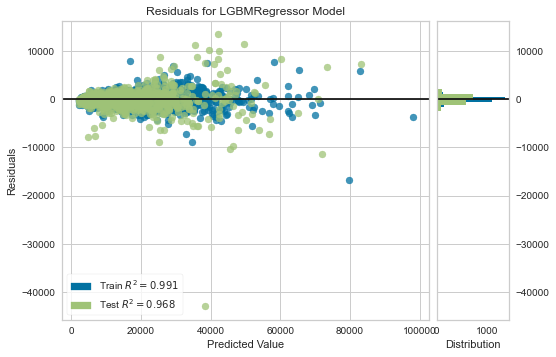

In [18]:
plot_model(tuned_lightgbm)

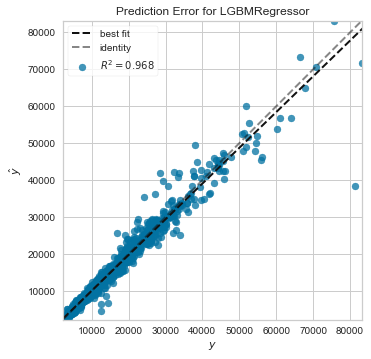

In [19]:
plot_model(tuned_lightgbm, plot = 'error')

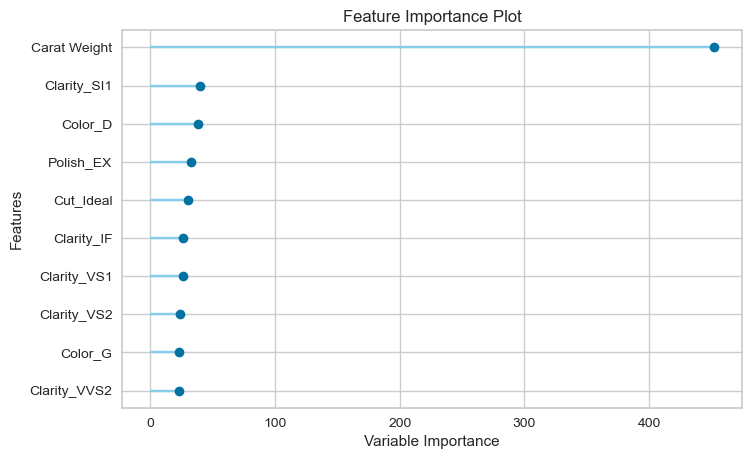

In [20]:
plot_model(tuned_lightgbm, plot='feature')

In [21]:
evaluate_model(tuned_lightgbm)

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1
importance_type,split
learning_rate,0.7
max_depth,90
min_child_samples,20
min_child_weight,0.001
min_split_gain,0
n_estimators,100


In [22]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,815.5947,3.533081e+06,1879.6493,0.9678,0.0926,0.0627


In [23]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [24]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.7000000000000001,
              max_depth=90, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=10,
              objective=None, random_state=123, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)


In [25]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,563.6509,1.128173e+06,1062.1547,0.9897,0.0672,0.0494


In [28]:
final_lightgbm.feature_name_

['Carat_Weight',
 'Cut_Fair',
 'Cut_Good',
 'Cut_Ideal',
 'Cut_Signature-Ideal',
 'Cut_Very_Good',
 'Color_D',
 'Color_E',
 'Color_F',
 'Color_G',
 'Color_H',
 'Color_I',
 'Clarity_FL',
 'Clarity_IF',
 'Clarity_SI1',
 'Clarity_VS1',
 'Clarity_VS2',
 'Clarity_VVS1',
 'Clarity_VVS2',
 'Polish_EX',
 'Polish_G',
 'Polish_ID',
 'Polish_VG',
 'Symmetry_EX',
 'Symmetry_G',
 'Symmetry_ID',
 'Symmetry_VG',
 'Report_AGSL',
 'Report_GIA']

In [27]:
data_unseen.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791
1,1.50,Fair,F,SI1,VG,VG,GIA,10450
2,1.01,Good,E,SI1,G,G,GIA,5161
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361
4,1.01,Good,I,SI1,VG,VG,GIA,4238


In [26]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
index,,,,,,,,,
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,13726.0144
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,9832.7325
2,1.01,Good,E,SI1,G,G,GIA,5161,5084.2239
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,34806.0152
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4070.4143


In [29]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Price, unseen_predictions.Label, 'R2')

0.9776

In [30]:
save_model(final_lightgbm,'Final Lightgbm Model 08Feb2020')

Transformation Pipeline and Model Succesfully Saved


In [31]:
saved_final_lightgbm = load_model('Final Lightgbm Model 08Feb2020')

Transformation Pipeline and Model Successfully Loaded


In [32]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

In [33]:
from pycaret.utils import check_metric
check_metric(new_prediction.Price, new_prediction.Label, 'R2')

0.9776